In [1]:
import pandas as pd
import seaborn as sns
from numpy import cov
import matplotlib.pyplot as plt

In [2]:
# Load the data

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
# Copy the original data in case we need it

In [5]:
train_og=train.copy()
test_og=test.copy()

In [6]:
#Set the view for displaying full data

In [7]:
pd.reset_option('^display.', silent=True)

In [8]:
#Get information about the data

In [9]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [11]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [13]:
print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (614, 13)
Test data shape:  (367, 12)


In [14]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:title={'center':'Loan_Status'}>

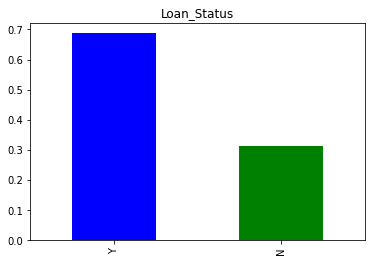

In [15]:
train["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status',color=['blue', 'green'])

In [16]:
train["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

<AxesSubplot:title={'center':'gender'}>

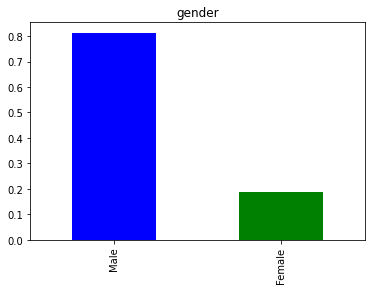

In [17]:
train["Gender"].value_counts(normalize=True).plot.bar(title = 'gender',color=['blue', 'green'])

In [18]:
train["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

<AxesSubplot:title={'center':'married'}>

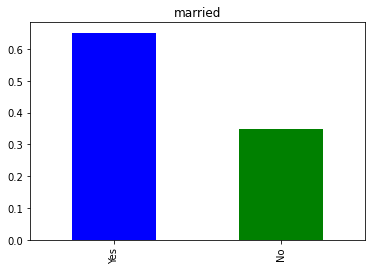

In [19]:
train["Married"].value_counts(normalize=True).plot.bar(title = 'married',color=['Blue', 'green'])

In [20]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:title={'center':'Dependents'}>

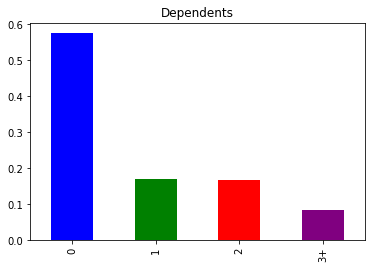

In [21]:
train["Dependents"].value_counts(normalize=True).plot.bar(title = 'Dependents',color=['Blue', 'green','red','purple'])

In [22]:
train["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:title={'center':'Education'}>

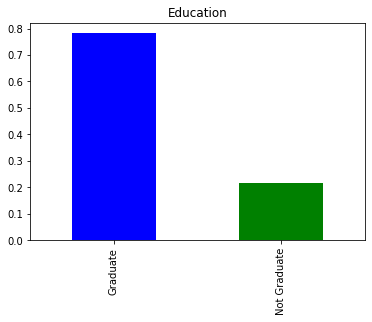

In [23]:
train["Education"].value_counts(normalize=True).plot.bar(title = 'Education',color=['Blue', 'green'])

In [24]:
train["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:title={'center':'Self_Employed'}>

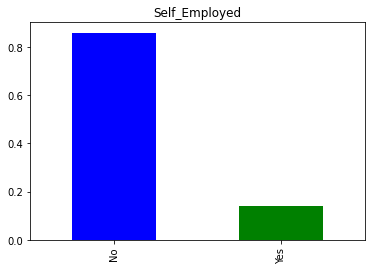

In [25]:
train["Self_Employed"].value_counts(normalize=True).plot.bar(title = 'Self_Employed',color=['Blue', 'green'])

In [26]:
train["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:title={'center':'Property_Area'}>

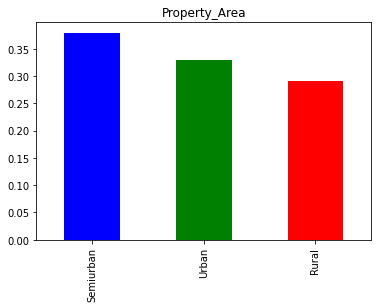

In [27]:
train["Property_Area"].value_counts(normalize=True).plot.bar(title = 'Property_Area',color=['Blue', 'green','red'])

In [28]:
train["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:title={'center':'Credit_History'}>

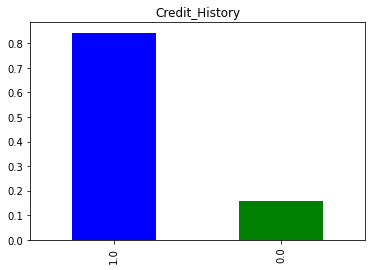

In [29]:
train["Credit_History"].value_counts(normalize=True).plot.bar(title = 'Credit_History',color=['Blue', 'green'])

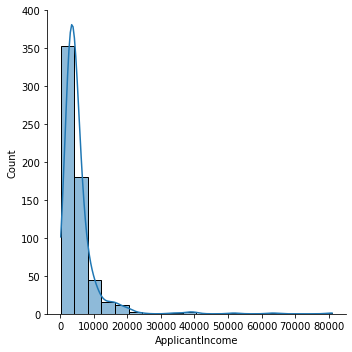

In [30]:
sns.displot(train.ApplicantIncome,kde=True,bins=20)

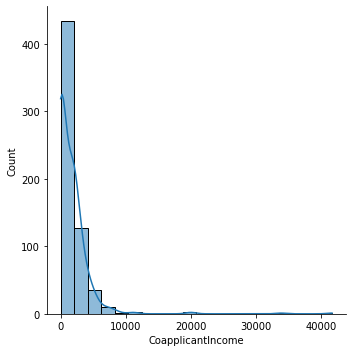

In [31]:
sns.displot(train.CoapplicantIncome ,kde=True,bins=20)

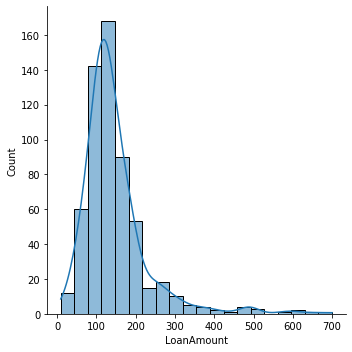

In [32]:
sns.displot(train.LoanAmount  ,kde=True,bins=20)

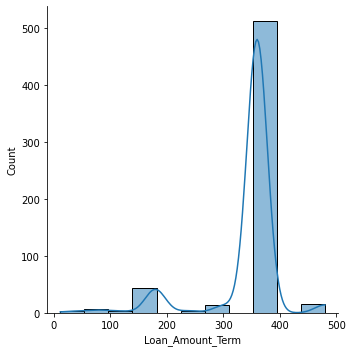

In [33]:
sns.displot(train.Loan_Amount_Term,kde=True)

In [34]:
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

<AxesSubplot:>

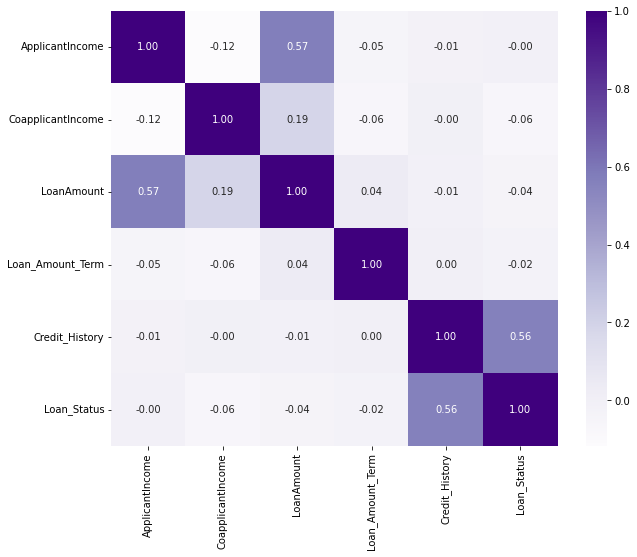

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot=True,fmt='.2f',cmap='Purples')

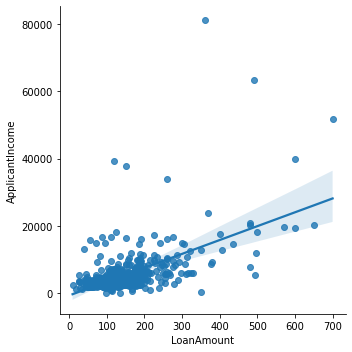

In [36]:
sns.lmplot(x="LoanAmount",y="ApplicantIncome",data=train)

<AxesSubplot:>

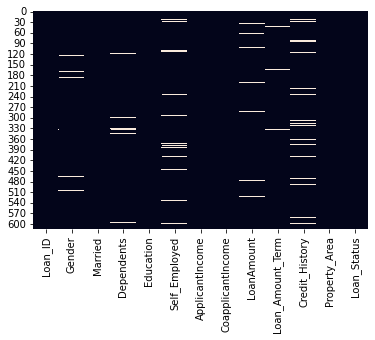

In [37]:
sns.heatmap(train.isnull(),cbar=False)